In [1]:
# Qa
from sklearn.datasets import fetch_openml
# Load data from https://www.openml.org/d/554
X, y = fetch_openml('mnist_784',return_X_y=True)
# Convert at scale (not always needed)
X = X / 255.

def MNIST_PlotDigit(data):
    import matplotlib
    import matplotlib.pyplot as plt
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    
MNIST_PlotDigit(X[0])    
    
def MNIST_GetDataSet(X, y):
    X, y = fetch_openml('mnist_784',return_X_y=True)
    X = X / 255.
    
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


In [2]:
# Qb
from sklearn.linear_model import SGDClassifier
import numpy as np
from sklearn.metrics import accuracy_score


#Creating the training and test datasets.
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

#Shuffle dataset
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

#Creating the binary classifier for 5!
y_train_5 = (y_train == '5')    
y_test_5  = (y_test == '5')

#Fit dataset
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
y_pred = sgd_clf.predict(X_test)

print('Accuracy score:', accuracy_score(y_test_5, y_pred))

Accuracy score: 0.9765


Prediction for X_test[15]:  [ True]


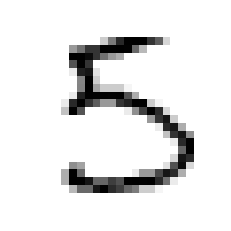

In [3]:
#Predict and print a 5
pred5 = sgd_clf.predict([X_test[15]])
print('Prediction for X_test[15]: ',pred5)
MNIST_PlotDigit(X_test[15])    

Prediction for X_test[15]:  [False]


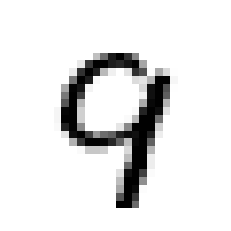

In [4]:
#Predict and print a non 5
pred9 = sgd_clf.predict([X_test[16]])
print('Prediction for X_test[15]: ',pred9) 
MNIST_PlotDigit(X_test[16])  

Prediction for X_test[15]:  [False]
Accuracy score: 0.9108


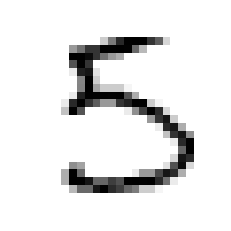

In [5]:
# Qc
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.metrics import accuracy_score

class DummyClassifier(BaseEstimator, ClassifierMixin):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

#Fit dataset
dum_clf = DummyClassifier()
dum_clf.fit(X_train, y_train_5)

#Predict and print a 5
dum_pred5 = dum_clf.predict(X_test)
print('Prediction for X_test[15]: ',dum_pred5[15])
MNIST_PlotDigit(X_test[15])    

print('Accuracy score:', accuracy_score(y_test_5, dum_pred5))

Accuracy scoren ligger lavere end dem på s. 83 i HOML. Men de er dog stadig sammenlignelige. 

### Qd Conclusion

Hvis man kigger på nøjagtigheden for de to classifiers, så er det nemt at se, at SGDClassifier har en bedre nøjagtighed end den selvimplementerede DummyClassifier. SGDClassifier har en nøjagtiged på 0.978, mens DummyClassifier kun har en nøjagtighed på 0.9108. Man skal dog her være opmærksom på, at denne nøjagtighed kan variere fra gang til gang, når man fitter sit datasæt. 
Man kan også se på de tal, som er blevet udvalgt, at SGDClassifier har gættet rigtig på X_test[15] (og korrekt klassificeret dette som et 5 tal), men at DummyClassifier ikke klassificeret dette korrekt. (Hvilket også giver god mening, da den altid giver negativ)

Læringen fra denne øvelse er, at nogen klassifier er bedre end andre til forskellige ting. Det kan derfor være en god idé at tjekke dem op imod hinanden, og finde den bedste på SIT datasæt. Dette kan dog godt tage længere tid, men som sæt af DummyClassifier og SGDClassifier, så er der forskel på nøjagtigheden, hvor man her vil vælge SGDClassifier over DummyClassifier. 